# <a id='Introduction'></a>Introduction

Central Line-Associated Bloodstream Infections (CLABSI) is a significant concern for the healthcare system, presenting serious health risks to patients and imposing substantial treatment costs. Early prediction of CLABSI enables healthcare providers to implement timely interventions, reducing infection rates, minimizing patient health risks, and lowering treatment expenses. Collaborating with our project partner, Texas Children’s Hospital (TCH), we aim to build on our prior work by leveraging their dataset to develop machine learning models capable of predicting the likelihood of CLABSI. 


# <a id='Introduction'></a>Objective

- To predict CLABSI infection in patients admitted to TEXAS CHILDREN HOSPITAL
- To undestand Type I and Type II errors and how these errors effect in healthcare industry
  

# <a id='Introduction'></a>Approach

We followed CRISP-DM method to understand the problem, analyze the dataset, develop ML models and finally evaluating them based on metrics. Steps we have followed are below:
- Data Understanding phase
- Data preprocessing
- Modelling
- Evaluation

In [2]:
import pandas as pd
import numpy as np
from numpy import NaN as NA
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import preprocessing
import sklearn.linear_model as lm
import sklearn.neighbors as knn
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
# for imputing missing values
from sklearn.impute import SimpleImputer
# for transformation pipelines
from sklearn.pipeline import Pipeline, make_pipeline
# for custom column transformer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.metrics import accuracy_score, recall_score, precision_score

from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from sklearn.preprocessing import RobustScaler
import pandas as pd
import openpyxl as op

## Data Understanding Phase

Loading the dataset and data dictionary

In [3]:
Bzan6361_clabsi_1 = pd.read_csv('bzan6361_clabsi_1.csv', low_memory=False)

In [4]:
CLABSI_Data_Dictionary_1 =  pd.read_excel("C:/Users/madhu/Downloads/CLABSI Data Dictionary_1.xlsx")

Shape of dataset

In [5]:
Bzan6361_clabsi_1.shape

(14236, 278)

Data Types

In [6]:
Bzan6361_clabsi_1.dtypes

PatientKey          int64
EncounterKey        int64
Date               object
InsertionDate      object
AgeGroup           object
                    ...  
CVICUDaysLast30     int64
ICUDaysLast15       int64
ICUDaysLast5        int64
ICUDaysLast3        int64
ICUDaysLast2        int64
Length: 278, dtype: object

In [7]:
Bzan6361_clabsi_1.head(3)

,PatientKey,EncounterKey,Date,InsertionDate,AgeGroup,DepartmentDSC,HospitalDay,LineDrainDSC,LineCount,LineDay,...,SedatedLast3,SedatedLast2,ICUDaysLast30,PICUDaysLast30,NICUDaysLast30,CVICUDaysLast30,ICUDaysLast15,ICUDaysLast5,ICUDaysLast3,ICUDaysLast2
0,887558,7883287,2019-04-02,4/2/2019 0:00,8 - 10 Years,LT CVICU 17,1,[REMOVED] CVC Triple Lumen - 04/01/19 Right In...,1,1,...,1,1,1,0,0,1,1,1,1,1
1,2874369,6865957,2018-10-30,10/30/2018 0:00,8 - 10 Years,LT CVICU 17,1,[REMOVED] CVC Double Lumen - 10/29/18 Right In...,1,1,...,1,1,1,0,0,1,1,1,1,1
2,2684699,4336219,2017-08-24,8/24/2017 0:00,14 - 16 Years,WT PUL ADOL ENDO,5,PICC Single Lumen - 08/23/17 Right Upperarm,1,1,...,0,0,0,0,0,0,0,0,0,0


Target variavle for this business problem is identified as HasCLABSI, which is a catogorical variable with two outcomes YES or NO. As this is a binary variable with two outcomes we can conclude this problem as a classification problem and further in modeling phase apply classification models like Logistic regression, KNN for classification, Random Forest and Neural networks.

Missing Values

In [8]:
print('The dataset has {} missing values.'.format(Bzan6361_clabsi_1.isnull().sum().sum()))

The dataset has 239605 missing values.


In [9]:
missing_data = Bzan6361_clabsi_1.isnull().sum()
missing_data_1 = missing_data[missing_data > 0]
print(missing_data_1)

DepartmentDSC                 325
ClabsiDTS                   12713
DaysToCLABSI                13143
MostRecentClabsiDTS         13003
FlushedToday                 1472
FlushedLast4                 1472
FlushedLast7                 1472
FlushedLast10                1472
CapChangesLastToday          1472
CapChangesLast4              1472
CapChangesLast7              1472
CapChangesLast10             1472
DressingChangesLastToday     1472
DressingChangesLast4         1472
DressingChangesLast7         1472
DressingChangesLast10        1472
TubingChangesLastToday       1472
TubingChangesLast4           1472
TubingChangesLast7           1472
TubingChangesLast10          1472
LastAnc                       198
LastAncDate                   198
LastAncDelta                 1134
MedicationsLast30            7143
MedicationsLast15            7143
MedicationsLast5             7143
MedicationsLast3             7143
MedicationsLast2             7143
ProceduresLast30               56
ProceduresLast

In [10]:
missing_data_columns = missing_data[missing_data > 0].index
print(Bzan6361_clabsi_1[missing_data_columns].dtypes)

DepartmentDSC                object
ClabsiDTS                    object
DaysToCLABSI                float64
MostRecentClabsiDTS          object
FlushedToday                float64
FlushedLast4                float64
FlushedLast7                float64
FlushedLast10               float64
CapChangesLastToday         float64
CapChangesLast4             float64
CapChangesLast7             float64
CapChangesLast10            float64
DressingChangesLastToday    float64
DressingChangesLast4        float64
DressingChangesLast7        float64
DressingChangesLast10       float64
TubingChangesLastToday      float64
TubingChangesLast4          float64
TubingChangesLast7          float64
TubingChangesLast10         float64
LastAnc                     float64
LastAncDate                  object
LastAncDelta                float64
MedicationsLast30            object
MedicationsLast15            object
MedicationsLast5             object
MedicationsLast3             object
MedicationsLast2            

In [11]:
# Missing values as a percentage of total 
missing_percentage = Bzan6361_clabsi_1.isnull().mean()*100
# Print missing values greater than 0, this gives columns only with missing values 
missing_percentage = missing_percentage[missing_percentage > 0]
print(missing_percentage)

DepartmentDSC                2.282945
ClabsiDTS                   89.301770
DaysToCLABSI                92.322282
MostRecentClabsiDTS         91.338859
FlushedToday                10.339983
FlushedLast4                10.339983
FlushedLast7                10.339983
FlushedLast10               10.339983
CapChangesLastToday         10.339983
CapChangesLast4             10.339983
CapChangesLast7             10.339983
CapChangesLast10            10.339983
DressingChangesLastToday    10.339983
DressingChangesLast4        10.339983
DressingChangesLast7        10.339983
DressingChangesLast10       10.339983
TubingChangesLastToday      10.339983
TubingChangesLast4          10.339983
TubingChangesLast7          10.339983
TubingChangesLast10         10.339983
LastAnc                      1.390840
LastAncDate                  1.390840
LastAncDelta                 7.965721
MedicationsLast30           50.175611
MedicationsLast15           50.175611
MedicationsLast5            50.175611
MedicationsL

In the above list we can see there are columns in which missing values are more than 70 percent of thier respective totals. If a column has more than 70-80% missing values, it's often dropped unless the column is crucial to the analysis. It's hard to extract meaningful information when most values are missing.With such a high proportion of missing data, the column may not contribute meaningfully to the analysis. Filling in too much missing data can introduce bias, especially if the missing values are not missing at random.

Duplicate Values

In [12]:
print('The dataset has {} duplicated values.'.format(Bzan6361_clabsi_1.duplicated().sum().sum()))

The dataset has 0 duplicated values.


In [13]:
# Check data types and filter numeric columns
numeric_columns = Bzan6361_clabsi_1.select_dtypes(include=[np.number]).columns
print("Numeric columns:", numeric_columns)
# Create a dictionary to store outliers for each column
outliers_dict = {}

# Loop through each numeric column and calculate outliers
for col in numeric_columns:
    Q1 = Bzan6361_clabsi_1[col].quantile(0.25)  # First quartile (25%)
    Q3 = Bzan6361_clabsi_1[col].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range

    # Define outliers as values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
    outliers = Bzan6361_clabsi_1[
        (Bzan6361_clabsi_1[col] < (Q1 - 1.5 * IQR)) | (Bzan6361_clabsi_1[col] > (Q3 + 1.5 * IQR))& (Bzan6361_clabsi_1[col] > 0)
    ]

    # Add outliers to the dictionary
    outliers_dict[col] = outliers[col]

# Print summary of outliers per column
for col, outliers in outliers_dict.items():
    print(f"Outliers in {col}: {len(outliers)}")

Numeric columns: Index(['PatientKey', 'EncounterKey', 'HospitalDay', 'LineCount', 'LineDay',
       'DaysToCLABSI', 'PastCLABSIs', 'LineDaysPort', 'LineDaysPICC',
       'LineDaysVenousAccess',
       ...
       'SedatedLast3', 'SedatedLast2', 'ICUDaysLast30', 'PICUDaysLast30',
       'NICUDaysLast30', 'CVICUDaysLast30', 'ICUDaysLast15', 'ICUDaysLast5',
       'ICUDaysLast3', 'ICUDaysLast2'],
      dtype='object', length=227)
Outliers in PatientKey: 0
Outliers in EncounterKey: 0
Outliers in HospitalDay: 1378
Outliers in LineCount: 2071
Outliers in LineDay: 1503
Outliers in DaysToCLABSI: 0
Outliers in PastCLABSIs: 1233
Outliers in LineDaysPort: 3395
Outliers in LineDaysPICC: 1826
Outliers in LineDaysVenousAccess: 0
Outliers in LineDaysSingleLumen: 2274
Outliers in LineDaysDoubleLumen: 1587
Outliers in LineDaysTripleLumen: 535
Outliers in LineDaysQuadrupleLumen: 0
Outliers in LineDaysMultiLumen: 1589
Outliers in LineDaysFemoral: 3353
Outliers in LineDaysSubclavian: 708
Outliers in LineDa

In [14]:
# Step 1: Convert the target variable to numeric (assuming target variable is called 'HasCLABSI')

Bzan6361_clabsi_1['HasCLABSI_numeric'] = Bzan6361_clabsi_1['HasCLABSI'].map({True: 1, False: 0})
# Step 2: Filter numeric columns (including the newly created 'HasCLABSI_numeric')
numeric_df_clabsi = Bzan6361_clabsi_1.select_dtypes(include=[float, 'int', 'int64'])
# Step 3: Calculate the correlation matrix
correlation_matrix = numeric_df_clabsi.corr()
target_corr = correlation_matrix['HasCLABSI_numeric'].dropna()
target_corr = target_corr[target_corr>0.03]
target_corr.sort_values(ascending=False)

HasCLABSI_numeric              1.000000
DiagnosisCancerLast15          0.051260
DiagnosisCancerLast30          0.046214
PICUDaysLast30                 0.045322
HCLAdministeredLast5           0.045147
AlteplaseAdministeredLast30    0.041839
HCLAdministeredLast3           0.041016
HCLAdministeredLast2           0.039651
HCLAdministeredLast15          0.038001
ICUDaysLast30                  0.037565
HospitalDay                    0.036599
MedsBowelRegimenLast30         0.035978
LineDaysDoubleLumen            0.035640
LineDaysMultiLumen             0.035278
HCLAdministeredLast30          0.034337
ICUDaysLast15                  0.032804
ChlorhexidineLast30            0.032151
CHGBathsLast30                 0.031565
Name: HasCLABSI_numeric, dtype: float64

<Axes: >

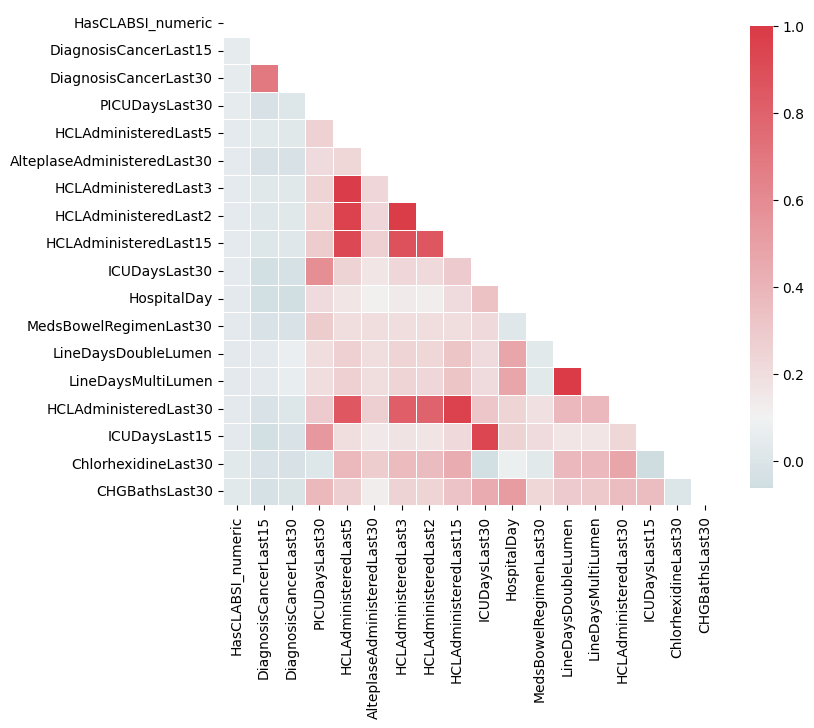

In [15]:
#### There are few high correlation variable
import seaborn as sns

scatterdata0 = Bzan6361_clabsi_1[['HasCLABSI_numeric', 'DiagnosisCancerLast15', 'DiagnosisCancerLast30', 
'PICUDaysLast30', 'HCLAdministeredLast5', 'AlteplaseAdministeredLast30', 
'HCLAdministeredLast3', 'HCLAdministeredLast2', 'HCLAdministeredLast15', 
'ICUDaysLast30', 'HospitalDay', 'MedsBowelRegimenLast30', 
'LineDaysDoubleLumen', 'LineDaysMultiLumen', 'HCLAdministeredLast30', 
'ICUDaysLast15', 'ChlorhexidineLast30', 'CHGBathsLast30']]
corr = scatterdata0.corr()
mask = np.triu(np.ones_like(corr, bool))
f, ax = plt.subplots(1,1, figsize=(8, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0.1, square=True, ax=ax, 
            linewidths=.5, cbar_kws={'shrink': .75})

Data imbalances

In [16]:
import pandas as pd

# Example: 'target' is the name of your target column
print(Bzan6361_clabsi_1['HasCLABSI'].value_counts())


HasCLABSI
False    14184
True        52
Name: count, dtype: int64


In [17]:
print(Bzan6361_clabsi_1['HasCLABSI'].value_counts(normalize=True) * 100)


HasCLABSI
False    99.634729
True      0.365271
Name: proportion, dtype: float64


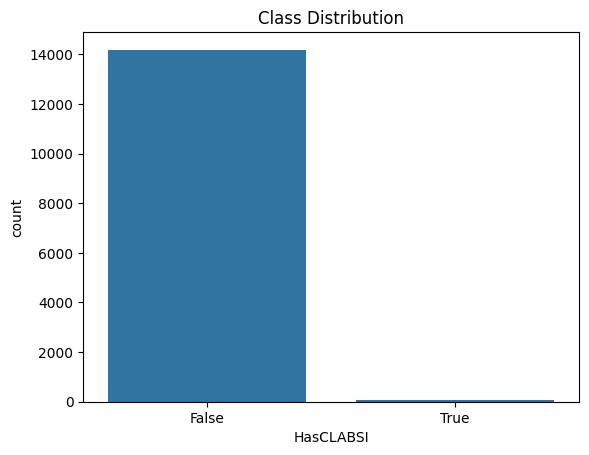

In [18]:
sns.countplot(x='HasCLABSI', data=Bzan6361_clabsi_1)
plt.title('Class Distribution')
plt.show()

## Data Preprocessing

Handling Missing Values

In [19]:
# filling the follwing missing values with 0 as there are very less percentage of missing values in these variables
# Dropped those variables with more than 70% of missing values
Bzan6361_clabsi_1['DaysToCLABSI'].fillna(0, inplace=True)
print('The DaysToCLABSI has {} missing values.'.format(Bzan6361_clabsi_1['DaysToCLABSI'].isnull().sum().sum()))
Bzan6361_clabsi_1['FlushedToday'].fillna(0, inplace=True)
Bzan6361_clabsi_1['FlushedLast4'].fillna(0, inplace=True)
Bzan6361_clabsi_1['FlushedLast7'].fillna(0, inplace=True)
Bzan6361_clabsi_1['FlushedLast10'].fillna(0, inplace=True)

Bzan6361_clabsi_1['CapChangesLastToday'].fillna(0, inplace=True)
Bzan6361_clabsi_1['CapChangesLast4'].fillna(0, inplace=True)
Bzan6361_clabsi_1['CapChangesLast7'].fillna(0, inplace=True)
Bzan6361_clabsi_1['CapChangesLast10'].fillna(0, inplace=True)

Bzan6361_clabsi_1['DressingChangesLastToday'].fillna(0, inplace=True)
Bzan6361_clabsi_1['DressingChangesLast4'].fillna(0, inplace=True)
Bzan6361_clabsi_1['DressingChangesLast7'].fillna(0, inplace=True)
Bzan6361_clabsi_1['DressingChangesLast10'].fillna(0, inplace=True)

Bzan6361_clabsi_1['TubingChangesLastToday'].fillna(0, inplace=True)
Bzan6361_clabsi_1['TubingChangesLast4'].fillna(0, inplace=True)
Bzan6361_clabsi_1['TubingChangesLast7'].fillna(0, inplace=True)
Bzan6361_clabsi_1['TubingChangesLast10'].fillna(0, inplace=True)

columns_to_drop = ['LastAncDelta','ClabsiDTS', 'MostRecentClabsiDTS', 'LastAnc','LastAncDate', 'MedicationsLast30'
                   ,'MedicationsLast15','MedicationsLast5', 'MedicationsLast3', 'MedicationsLast2', 'ProceduresLast30', 'ProceduresLast15',
                   'ProceduresLast5', 'ProceduresLast3', 'ProceduresLast2', 'ICDCodesLast30', 'ICDCategoriesLast30',
                   'DiagnosisLast30', 'DiagnosisLast15', 'DiagnosisLast5', 'DiagnosisLast3', 'DiagnosisLast2',
                   'SurgeryGroupsLast30', 'SurgerySubGroupsLast30', 'SurgeriesLast30', 'SurgeriesLast15', 'SurgeriesLast5',
                   'SurgeriesLast3', 'SurgeriesLast2']

# Drop the columns
Bzan6361_clabsi_1.drop(columns=columns_to_drop, inplace=True)

Bzan6361_clabsi_1.isnull().sum().sum()

The DaysToCLABSI has 0 missing values.


325

In [20]:
Bzan6361_clabsi_1.isnull().sum()

PatientKey           0
EncounterKey         0
Date                 0
InsertionDate        0
AgeGroup             0
                    ..
ICUDaysLast15        0
ICUDaysLast5         0
ICUDaysLast3         0
ICUDaysLast2         0
HasCLABSI_numeric    0
Length: 250, dtype: int64

In [21]:
missing_data = Bzan6361_clabsi_1.isnull().sum()
missing_data_1 = missing_data[missing_data > 0]
print(missing_data_1)

DepartmentDSC    325
dtype: int64


After imputing the missing values which are least impactful based on their correlation with target variable and filling the rest of the missing values with 0 the only variable that is left is DepartmentDSC Which is a catogorical variable and seems to have some relation with target variable. hence we are using a different way of imputing to fill these missing values in DepartmentDSC. 

In [22]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming your dataset is loaded into a DataFrame called df
# Replace 'DepartmentDSC' and 'AgeGroup' with the actual column names if different
contingency_table = pd.crosstab(Bzan6361_clabsi_1['DepartmentDSC'], Bzan6361_clabsi_1['AgeGroup'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected)

# Interpretation
if p < 0.05:
    print("There is a significant association between DepartmentDSC and AgeGroup.")
else:
    print("There is no significant association between DepartmentDSC and AgeGroup.")


Chi-Square Statistic: 33890.71268766533
p-value: 0.0
Degrees of Freedom: 810
Expected Frequencies Table:
 [[9.36161311e+01 9.38049026e+00 1.03824312e+01 9.39501114e+00
  1.19506865e+01 6.54891812e+00 1.88190641e+01 9.72899145e-01
  2.43950830e+00 2.03292359e-01 1.45208828e-02 1.45208828e-02
  4.35626483e-02 4.35626483e-02 1.45208828e-02 1.72798505e+01
  1.45208828e-02 3.58665804e+00 1.72798505e+01]
 [4.44908346e+01 4.45805478e+00 4.93422471e+00 4.46495579e+00
  5.67953418e+00 3.11235713e+00 8.94371361e+00 4.62367910e-01
  1.15937028e+00 9.66141902e-02 6.90101359e-03 6.90101359e-03
  2.07030408e-02 2.07030408e-02 6.90101359e-03 8.21220617e+00
  6.90101359e-03 1.70455036e+00 8.21220617e+00]
 [6.30286823e+01 6.31557760e+00 6.99015168e+00 6.32535404e+00
  8.04600676e+00 4.40917260e+00 1.26702609e+01 6.55021206e-01
  1.64244123e+00 1.36870103e-01 9.77643591e-03 9.77643591e-03
  2.93293077e-02 2.93293077e-02 9.77643591e-03 1.16339587e+01
  9.77643591e-03 2.41477967e+00 1.16339587e+01]
 [4.17

When we run chi-square test we have found that there is a significant association between DepartmentDSC and AgeGroup. hence we can use AgeGroup for imputing DepartmentDSC .


In [23]:
import pandas as pd

# Assuming your dataset is in a DataFrame called df

# 1. Create a mapping of AgeGroup to the most common DepartmentDSC within each AgeGroup
department_impute_map = Bzan6361_clabsi_1.groupby('AgeGroup')['DepartmentDSC'].agg(lambda x: x.mode()[0])

# 2. Define a function to fill in missing DepartmentDSC based on AgeGroup
def impute_department(row):
    if pd.isnull(row['DepartmentDSC']):
        return department_impute_map[row['AgeGroup']]
    else:
        return row['DepartmentDSC']

# 3. Apply the imputation function to the dataset
Bzan6361_clabsi_1['DepartmentDSC'] = Bzan6361_clabsi_1.apply(impute_department, axis=1)

# Display the result to confirm imputation
missing_data = Bzan6361_clabsi_1.isnull().sum()
missing_data_1 = missing_data[missing_data > 0]
print(missing_data_1)

Bzan6361_clabsi_1.isnull().sum().sum()

Series([], dtype: int64)


0

There are zero missing values which mean missing values in DepartmentDSC are imputed with the help of AgeGroup variable.

OUTLIERS

In [24]:
# Check data types and filter numeric columns
numeric_columns = Bzan6361_clabsi_1.select_dtypes(include=[np.number]).columns
print("Numeric columns:", numeric_columns)

Numeric columns: Index(['PatientKey', 'EncounterKey', 'HospitalDay', 'LineCount', 'LineDay',
       'DaysToCLABSI', 'PastCLABSIs', 'LineDaysPort', 'LineDaysPICC',
       'LineDaysVenousAccess',
       ...
       'SedatedLast2', 'ICUDaysLast30', 'PICUDaysLast30', 'NICUDaysLast30',
       'CVICUDaysLast30', 'ICUDaysLast15', 'ICUDaysLast5', 'ICUDaysLast3',
       'ICUDaysLast2', 'HasCLABSI_numeric'],
      dtype='object', length=226)


In [25]:
# Create a dictionary to store outliers for each column
outliers_dict = {}

# Loop through each numeric column and calculate outliers
for col in numeric_columns:
    Q1 = Bzan6361_clabsi_1[col].quantile(0.25)  # First quartile (25%)
    Q3 = Bzan6361_clabsi_1[col].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range

    # Define outliers as values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
    outliers = Bzan6361_clabsi_1[
        (Bzan6361_clabsi_1[col] < (Q1 - 1.5 * IQR)) | (Bzan6361_clabsi_1[col] > (Q3 + 1.5 * IQR))& (Bzan6361_clabsi_1[col] > 0)
    ]

    # Add outliers to the dictionary
    outliers_dict[col] = outliers[col]

# Print summary of outliers per column
for col, outliers in outliers_dict.items():
    print(f"Outliers in {col}: {len(outliers)}")

Outliers in PatientKey: 0
Outliers in EncounterKey: 0
Outliers in HospitalDay: 1378
Outliers in LineCount: 2071
Outliers in LineDay: 1503
Outliers in DaysToCLABSI: 1067
Outliers in PastCLABSIs: 1233
Outliers in LineDaysPort: 3395
Outliers in LineDaysPICC: 1826
Outliers in LineDaysVenousAccess: 0
Outliers in LineDaysSingleLumen: 2274
Outliers in LineDaysDoubleLumen: 1587
Outliers in LineDaysTripleLumen: 535
Outliers in LineDaysQuadrupleLumen: 0
Outliers in LineDaysMultiLumen: 1589
Outliers in LineDaysFemoral: 3353
Outliers in LineDaysSubclavian: 708
Outliers in LineDaysUpperArm: 3496
Outliers in LineDaysJugular: 3372
Outliers in LineDaysChest: 2762
Outliers in LineDaysLeg: 1554
Outliers in FlushedToday: 2098
Outliers in FlushedLast4: 1077
Outliers in FlushedLast7: 987
Outliers in FlushedLast10: 976
Outliers in CapChangesLastToday: 53
Outliers in CapChangesLast4: 64
Outliers in CapChangesLast7: 127
Outliers in CapChangesLast10: 886
Outliers in DressingChangesLastToday: 1639
Outliers in D

In [26]:
# Comparing Comparing the mean of numerical variables when the CLABSI is true and false.
# It able to see the big gap bacasue outliers pull up the mean when CLABSI is True.

mean_numericals_clabsi_true = Bzan6361_clabsi_1[Bzan6361_clabsi_1['HasCLABSI'] == True][numeric_columns].mean()

mean_numericals_clabsi_False = Bzan6361_clabsi_1[Bzan6361_clabsi_1['HasCLABSI'] == False][numeric_columns].mean()

comparing_numericals = pd.DataFrame({
    'Clabsi is True':mean_numericals_clabsi_true,
    'Clabsi is False':mean_numericals_clabsi_False
})

print(comparing_numericals)

                   Clabsi is True  Clabsi is False
PatientKey           2.309953e+06     2.267180e+06
EncounterKey         5.848268e+06     6.033589e+06
HospitalDay          6.946154e+01     3.769282e+01
LineCount            1.153846e+00     1.179710e+00
LineDay              4.803846e+01     8.469430e+01
...                           ...              ...
ICUDaysLast15        6.557692e+00     3.556895e+00
ICUDaysLast5         2.326923e+00     1.472363e+00
ICUDaysLast3         1.423077e+00     9.330936e-01
ICUDaysLast2         9.615385e-01     6.411450e-01
HasCLABSI_numeric    1.000000e+00     0.000000e+00

[226 rows x 2 columns]


In [27]:
from sklearn.preprocessing import RobustScaler

# Identify numerical columns
numerical_columns = Bzan6361_clabsi_1.select_dtypes(include=['float64', 'int64']).columns

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform only the numerical columns
Bzan6361_clabsi_1[numerical_columns] = scaler.fit_transform(Bzan6361_clabsi_1[numerical_columns])

# Display the updated dataset
print(Bzan6361_clabsi_1)


       PatientKey  EncounterKey        Date    InsertionDate       AgeGroup  \
0       -1.488436      1.101243  2019-04-02    4/2/2019 0:00   8 - 10 Years   
1        0.063403      0.493710  2018-10-30  10/30/2018 0:00   8 - 10 Years   
2       -0.084743     -1.017009  2017-08-24   8/24/2017 0:00  14 - 16 Years   
3        0.142686      1.237406  2019-05-18   5/18/2019 0:00    0 - 2 Years   
4       -1.508665      1.246414  2019-05-22   5/22/2019 0:00   8 - 10 Years   
...           ...           ...         ...              ...            ...   
14231    0.057893      0.646734  2018-12-30  12/25/2018 0:00    0 - 2 Years   
14232    0.057893      0.646734  2018-12-31  12/25/2018 0:00    0 - 2 Years   
14233    0.057893      0.646734  2019-01-03  12/25/2018 0:00    0 - 2 Years   
14234    0.057893      0.646734  2019-01-08  12/25/2018 0:00    0 - 2 Years   
14235    0.057893      0.646734  2019-01-09  12/25/2018 0:00    0 - 2 Years   

          DepartmentDSC  HospitalDay  \
0          

In [28]:
# Comparing Comparing the mean of numerical variables when the CLABSI is true and false.
# It able to see the big gap bacasue outliers pull up the mean when CLABSI is True.

mean_numericals_clabsi_true = Bzan6361_clabsi_1[Bzan6361_clabsi_1['HasCLABSI'] == True][numeric_columns].mean()

mean_numericals_clabsi_False = Bzan6361_clabsi_1[Bzan6361_clabsi_1['HasCLABSI'] == False][numeric_columns].mean()

comparing_numericals = pd.DataFrame({
    'Clabsi is True':mean_numericals_clabsi_true,
    'Clabsi is False':mean_numericals_clabsi_False
})

print(comparing_numericals)

                   Clabsi is True  Clabsi is False
PatientKey              -0.377446        -0.410855
EncounterKey            -0.114038        -0.003367
HospitalDay              1.272894         0.516496
LineCount                0.153846         0.179710
LineDay                  0.362876         0.894120
...                           ...              ...
ICUDaysLast15            1.092949         0.592816
ICUDaysLast5             0.581731         0.368091
ICUDaysLast3             0.474359         0.311031
ICUDaysLast2             0.480769         0.320572
HasCLABSI_numeric        1.000000         0.000000

[226 rows x 2 columns]


The means of the numerical variables before and after robust scaling indicate that robust scaling has effectively reduced the influence of outliers, especially for variables with high means or large differences between "Clabsi is True" and "Clabsi is False" groups.

Before Scaling:

Some variables (e.g., CountMedicationsLast30 and HCLAdministeredLast15) show large differences between the mean values of the "Clabsi is True" and "Clabsi is False" groups. This suggests the presence of significant outliers, which are skewing the means.
Many variables have extreme mean values, indicating that outliers are likely affecting the central tendency.
After Robust Scaling:

The means of many variables are closer between the two groups. For instance, CountMedicationsLast30 and HCLAdministeredLast15 now show much smaller differences between "Clabsi is True" and "Clabsi is False," indicating reduced outlier influence.
Robust scaling has effectively brought the means to a more comparable level, especially for variables with previously extreme values, as it scales based on the median and interquartile range, making it resistant to outliers.
Conclusion
Robust scaling appears to have successfully mitigated the impact of outliers on the dataset. This makes the data more suitable for further analysis, as extreme values are less likely to skew results.

Handling Data imbalance in Target variable

Our objective is to apply SMOTE to handle imbalances. Our plan is to perform SMOTE after data split during modeling phase hence we will be continuing this step in  modeling.

## Modeling Phase

Adaline Model

In [29]:
#drop unique columns 
adaline = Bzan6361_clabsi_1


In [30]:
# use variables with correaltion highter than 0.02

adaline_Cols = ['HasCLABSI_numeric','DiagnosisCancerLast15',
                  'PICUDaysLast30',
                  'HCLAdministeredLast5',
                  'AlteplaseAdministeredLast30',
                  'HCLAdministeredLast15',
                  'ICUDaysLast30',
                  'HospitalDay',
                  'MedsBowelRegimenLast30',
                  'LineDaysDoubleLumen',
                  'ChlorhexidineLast30',
                  'CHGBathsLast30',
                'HCLAdministeredLast30',         
'ICUDaysLast15',                  
'ChlorhexidineLast30',            
'CHGBathsLast30',                
'FlushedLast10',                  
'CHGBathsLast15',                 
'CountMedicationsLast30',         
'SurgeriesAbdominalLast30',    
'FlushedLast7',                   
'DiagnosisDisorderLast15',        
'CountMedicationsLast15',         
'DressingChangesLast10',          
'CountMedicationsLast5',          
'MedsBowelRegimenLast15',         
'AlteplaseAdministeredLast15',    
'ICUDaysLast5',                   
'MedsOralCareLast15',             
'SurgeriesBloodLast30',           
'UndergoingChemoTreatment',       
'ICUDaysLast3',                   
'CapChangesLast10',               
'ICUDaysLast2',                   
'CountMedicationsLast3',          
'MedsOralCareLast5'              

                  
              ]

adaline=adaline[adaline_Cols]

#### Step 2: Preprocess data (Rescale Numerica Input Variables)
We will only use numerical variables (i.e., int and float only).

Split the data into train set and test set.


In [31]:
from sklearn.preprocessing import StandardScaler

adaline_X_numeric = adaline.drop(columns='HasCLABSI_numeric').select_dtypes('number')# all dtypes would be numbers only


z_scaler = StandardScaler()
scaled = z_scaler.fit_transform(adaline_X_numeric)
adaline_X_numeric = pd.DataFrame(scaled, columns=adaline_X_numeric.columns)

In [32]:
adaline_Y =  adaline['HasCLABSI_numeric']

In [35]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import numpy.random as random
random_state = 10 

adaline_X_train, adaline_X_test, adaline_y_train, adaline_y_test = train_test_split(adaline_X_numeric,
                                                                                    adaline_Y,
                                                                                    test_size=0.4,
                                                                                    random_state=random_state, shuffle=True)

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(adaline_X_train, adaline_y_train)

In [36]:
X_resampled.shape, adaline_X_test.shape, y_resampled.shape, adaline_y_test.shape

((17024, 35), (5695, 35), (17024,), (5695,))

In [37]:
import numpy.random as random

random_state = 10
rgen = random.RandomState(random_state)

# useful variables, include bias
n = adaline.shape[0]
m = 35
# ------
epoches = 10
eta = 0.01  #eta is learning rate


w_old = rgen.normal(loc=0.0, scale=0.01, size = m + 1)
delta_w = np.zeros(m + 1)


print(f'weight (vector) w has {w_old.shape[0]} elements, as follows:')
print()
print(np.around(w_old, 4))

weight (vector) w has 36 elements, as follows:

[ 0.0133  0.0072 -0.0155 -0.0001  0.0062 -0.0072  0.0027  0.0011  0.
 -0.0017  0.0043  0.012  -0.0097  0.0103  0.0023  0.0045 -0.0114  0.0014
  0.0148 -0.0108 -0.0198 -0.0174  0.0027  0.0238  0.0112  0.0167  0.001
  0.014  -0.0027  0.0061 -0.0027 -0.0055  0.0013 -0.0048  0.0131  0.002 ]


Weight Initialization:
In machine learning, weights are typically initialized with small random values to avoid symmetry during training.
These weights will be updated iteratively during the training process using the Adaline learning rule.

Bias Term:
The inclusion of m + 1 (instead of m) accommodates the bias term, which accounts for the intercept in the model.

Learning Rate (eta):
This controls how much the weights are adjusted with each iteration. A smaller learning rate makes updates slower and more precise.

#### Step 4: Apply Adaline Model Loop, with epochs equal to 10 and eta equal to 0.01

In [38]:
cost_values = []

for _ in range(epoches):
    # net input X values
    z = np.dot(X_resampled, w_old[1:]) + w_old[0]
    # activation
    z_act = z * 1.0
    # calculate error
    error = y_resampled - z_act
    # gradient
    gradient = - np.dot(X_resampled.T, error)

    # delta_weight: two-step
    delta_w[1:] = - eta * gradient
    delta_w[0] = eta * error.sum()
    # update weight
    w_new = w_old + delta_w
    w_old = w_new
    
    # new in for-loop: calculate value of cost function
    cost = error.dot(error) / 2.0
    cost_values.append(cost)

In [39]:
print(np.round(cost_values, 3))

[3.80639800e+03 1.11675025e+10 1.46390597e+17 1.98051919e+24
 2.69177729e+31 3.66256045e+38 4.98487960e+45 6.78510308e+52
 9.23562790e+59 1.25712514e+67]


#### Step 5 : *Re-train model with new `eta`*

In [40]:
random_state = 10
rgen = random.RandomState(random_state)


n = adaline.shape[0]
m = 35
# ------
epoches = 10
eta = 0.0000001


w_old = rgen.normal(loc=0.0, scale=0.01, size = m + 1)
delta_w = np.zeros(m + 1)


print(f'weight (vector) w has {w_old.shape[0]} elements, as follows:')
print()
print(np.around(w_old, 4))


weight (vector) w has 36 elements, as follows:

[ 0.0133  0.0072 -0.0155 -0.0001  0.0062 -0.0072  0.0027  0.0011  0.
 -0.0017  0.0043  0.012  -0.0097  0.0103  0.0023  0.0045 -0.0114  0.0014
  0.0148 -0.0108 -0.0198 -0.0174  0.0027  0.0238  0.0112  0.0167  0.001
  0.014  -0.0027  0.0061 -0.0027 -0.0055  0.0013 -0.0048  0.0131  0.002 ]


In [41]:
cost_values = []

for _ in range(epoches):
    
    z = np.dot(X_resampled, w_old[1:]) + w_old[0]
    
    z_act = z * 1.0
    
    error = y_resampled - z_act
    
    gradient = - np.dot(X_resampled.T, error)
    # delta_weight: 
    delta_w[1:] = - eta * gradient
    delta_w[0] = eta * error.sum()
    # update weight
    w_new = w_old + delta_w
    w_old = w_new
    
    # new in for-loop: calculate value of cost function
    cost = error.dot(error) / 2.0
    cost_values.append(cost)

In [42]:
print(np.round(cost_values, 3))

[3806.398 3737.125 3672.163 3611.208 3553.979 3500.215 3449.673 3402.127
 3357.368 3315.203]


In [43]:
z = np.dot(X_resampled, w_old[1:]) + w_old[0]


z_clip = np.clip(z, a_min=-250, a_max=250)
z_act = 1. / (1. + np.exp(-z_clip))


y_pred = (z_act >= 0.5).astype(int)


accuracy = accuracy_score(y_true=y_resampled, y_pred=y_pred)


n_correct = y_resampled.shape[0] * accuracy
n_incorrect = y_resampled.shape[0] * (1 - accuracy)


print('The trained model made {:.1f} correct and {:.1f} incorrect classification on the train data.'.format(
    n_correct, n_incorrect))
print('Accuracy is {:.3f}'.format(accuracy))

The trained model made 11016.0 correct and 6008.0 incorrect classification on the train data.
Accuracy is 0.647


#### Step 6:  confusion_matrix, checking the result.

assess model accuracy* - on test set

In [44]:
adaline_X_test.shape, adaline_y_test.shape

((5695, 35), (5695,))

In [45]:
z = np.dot(adaline_X_test, w_old[1:]) + w_old[0]


z_clip = np.clip(z, a_min=-250, a_max=250)
z_act = 1. / (1. + np.exp(-z_clip))


y_pred = (z_act >= 0.5).astype(int)


accuracy = accuracy_score(y_true=adaline_y_test, y_pred=y_pred)


n_correct = adaline_y_test.shape[0] * accuracy
n_incorrect = adaline_y_test.shape[0] * (1 - accuracy)


print('The trained model made {:.1f} correct and {:.1f} incorrect classification on the test data.'.format(
    n_correct, n_incorrect))
print('Accuracy is {:.3f}'.format(accuracy))

The trained model made 3133.0 correct and 2562.0 incorrect classification on the test data.
Accuracy is 0.550


In [46]:
adl_accuracy = accuracy_score(y_true=adaline_y_test, y_pred= y_pred)

adl_precision = precision_score(y_true=adaline_y_test, y_pred= y_pred) 

adl_recall = recall_score(y_true=adaline_y_test, y_pred= y_pred)

print("Accuracy:", adl_accuracy)
print("Precision:", adl_precision)
print("Recall:", adl_recall)

Accuracy: 0.5501316944688323
Precision: 0.004295197188598204
Recall: 0.4782608695652174


<Figure size 2000x1000 with 0 Axes>

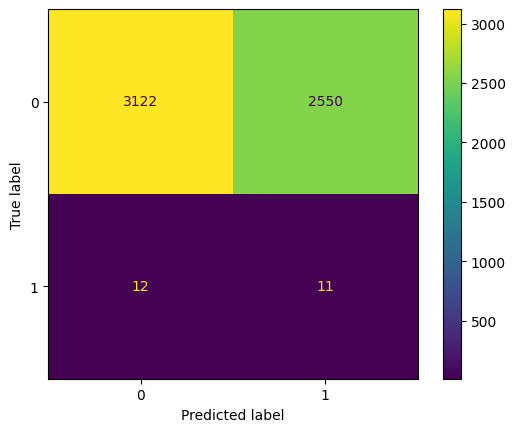

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

knn_metrics = confusion_matrix(adaline_y_test, y_pred)

plt.figure(figsize=(20, 10))
ConfusionMatrixDisplay(confusion_matrix=knn_metrics).plot();
plt.show()

KNN K Nearest Neighbours



#### Step 1: Complete the Data Preparation Phase

In [48]:
# change catogrical varibale to dummy variables
df=Bzan6361_clabsi_1
nominalCols = ['HasCLABSI_numeric',
               'AgeGroup',
               'DepartmentDSC',
               'HasFutureEncounterCLABSI',
               'HadPreviousCLABSI',
               'HasRecentLDAFlowsheetRecords',
               'DiagnosisLeukemiaLast30',
               'DiagnosisLeukemiaLast15',
               'DiagnosisLeukemiaLast5',
               'DiagnosisLeukemiaLast3',
               'DiagnosisLeukemiaLast2',
               'DiagnosisTransplantLast30',
               'DiagnosisTransplantLast15',
               'DiagnosisTransplantLast5',
               'DiagnosisTransplantLast3',
               'DiagnosisTransplantLast2',
               'DiagnosisSwellingLast30',
               'DiagnosisSwellingLast15',
               'DiagnosisSwellingLast5',
               'DiagnosisSwellingLast3',
               'DiagnosisSwellingLast2'
               
              ]
X_nominal = df[nominalCols]


transformerNominal = make_pipeline(preprocessing.OneHotEncoder(handle_unknown='ignore', categories='auto'))

oneHotEncoder = preprocessing.OneHotEncoder(handle_unknown='ignore', categories='auto')
oneHotEncoder.fit(X_nominal)

#column label
labelsPpl1 = ['_'.join([item[0], str(label)]) for item in zip(nominalCols, oneHotEncoder.categories_) for label in item[1].
              tolist()]

In [49]:
transformerNominal = make_pipeline(preprocessing.OneHotEncoder(handle_unknown='ignore', categories='auto'))

oneHotEncoder = preprocessing.OneHotEncoder(handle_unknown='ignore', categories='auto')
oneHotEncoder.fit(X_nominal)

#column label
labelsPpl1 = ['_'.join([item[0], str(label)]) for item in zip(nominalCols, oneHotEncoder.categories_) for label in item[1].
              tolist()]


outputPpl1 = transformerNominal.fit_transform(X_nominal).toarray()
outPpl1 = pd.DataFrame(outputPpl1, columns=labelsPpl1, index=X_nominal.index)
outPpl1.head()

,HasCLABSI_numeric_0.0,HasCLABSI_numeric_1.0,AgeGroup_0 - 2 Years,AgeGroup_10 - 12 Years,AgeGroup_12 - 14 Years,AgeGroup_14 - 16 Years,AgeGroup_16 - 18 Years,AgeGroup_18 - 20 Years,AgeGroup_2 - 4 Years,AgeGroup_20 - 22 Years,...,DiagnosisSwellingLast30_False,DiagnosisSwellingLast30_True,DiagnosisSwellingLast15_False,DiagnosisSwellingLast15_True,DiagnosisSwellingLast5_False,DiagnosisSwellingLast5_True,DiagnosisSwellingLast3_False,DiagnosisSwellingLast3_True,DiagnosisSwellingLast2_False,DiagnosisSwellingLast2_True
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [50]:
# standardize numerical variables which selected from assignment#1
intervalLogCols = ['HasCLABSI_numeric','DiagnosisCancerLast15',
                  'PICUDaysLast30',
                  'HCLAdministeredLast5',
                  'AlteplaseAdministeredLast30',
                  'HCLAdministeredLast15',
                  'ICUDaysLast30',
                  'HospitalDay',
                  'MedsBowelRegimenLast30',
                  'LineDaysDoubleLumen',
                  'ChlorhexidineLast30',
                  'CHGBathsLast30',
                'HCLAdministeredLast30',         
'ICUDaysLast15',                  
'ChlorhexidineLast30',            
'CHGBathsLast30'      
                  
              ]
X_intervalLog = df[intervalLogCols]

In [51]:
#make a instance
transformerIntervalLog = make_pipeline(preprocessing.FunctionTransformer(np.log1p, validate=False),
                                       preprocessing.StandardScaler())


#column label
labelsPpl2 = X_intervalLog.columns.tolist()

In [52]:
outputPpl2 = transformerIntervalLog.fit_transform(X_intervalLog)
outPpl2 = pd.DataFrame(outputPpl2, columns=labelsPpl2, index=X_intervalLog.index)
outPpl2.head()

,HasCLABSI_numeric,DiagnosisCancerLast15,PICUDaysLast30,HCLAdministeredLast5,AlteplaseAdministeredLast30,HCLAdministeredLast15,ICUDaysLast30,HospitalDay,MedsBowelRegimenLast30,LineDaysDoubleLumen,ChlorhexidineLast30,CHGBathsLast30,HCLAdministeredLast30,ICUDaysLast15,ChlorhexidineLast30,CHGBathsLast30
0,-0.060548,-0.110959,-0.514385,0.192683,-0.229034,-0.225029,-0.465275,-1.061588,-0.429969,-0.717290,-0.196968,-1.085705,-0.355232,-0.380594,-0.196968,-1.085705
1,-0.060548,-0.110959,-0.514385,-0.561137,-0.229034,-0.563402,-0.465275,-1.061588,0.733626,-0.618828,-0.196968,-1.085705,-0.567810,-0.380594,-0.196968,-1.085705
2,-0.060548,-0.110959,-0.514385,-0.561137,-0.229034,-0.563402,-0.698348,-0.833000,-0.429969,-0.717290,-0.196968,-0.885598,-0.567810,-0.702997,-0.196968,-0.885598
3,-0.060548,-0.110959,0.181227,-0.561137,-0.229034,-0.563402,-0.465275,-1.001413,-0.429969,-0.717290,-0.196968,-0.885598,-0.567810,-0.380594,-0.196968,-0.885598
4,-0.060548,-0.110959,-0.514385,0.435359,-0.229034,-0.086492,-0.465275,-1.061588,-0.429969,-0.618828,-0.196968,-1.085705,-0.261906,-0.380594,-0.196968,-1.085705


In [53]:
# Combine pipeline1 and pipeline2

X_final = pd.concat([outPpl1, outPpl2], axis=1)  
X_final.head(3)

,HasCLABSI_numeric_0.0,HasCLABSI_numeric_1.0,AgeGroup_0 - 2 Years,AgeGroup_10 - 12 Years,AgeGroup_12 - 14 Years,AgeGroup_14 - 16 Years,AgeGroup_16 - 18 Years,AgeGroup_18 - 20 Years,AgeGroup_2 - 4 Years,AgeGroup_20 - 22 Years,...,ICUDaysLast30,HospitalDay,MedsBowelRegimenLast30,LineDaysDoubleLumen,ChlorhexidineLast30,CHGBathsLast30,HCLAdministeredLast30,ICUDaysLast15,ChlorhexidineLast30,CHGBathsLast30
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.465275,-1.061588,-0.429969,-0.717290,-0.196968,-1.085705,-0.355232,-0.380594,-0.196968,-1.085705
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.465275,-1.061588,0.733626,-0.618828,-0.196968,-1.085705,-0.567810,-0.380594,-0.196968,-1.085705
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.698348,-0.833000,-0.429969,-0.717290,-0.196968,-0.885598,-0.567810,-0.702997,-0.196968,-0.885598


#### Step 2: Use Train_test_split to divide variables into training set and test set.

In [54]:
knn_model=X_final
knn_model.shape

(14236, 119)

In [55]:
# Split the data into features (X) and target (y)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

knn_X = knn_model.drop(['HasCLABSI_numeric_0.0', 'HasCLABSI_numeric_1.0','HasCLABSI_numeric'], axis=1)
knn_y = df['HasCLABSI_numeric']

In [56]:
from sklearn import preprocessing
z_scaler = preprocessing.StandardScaler()
knn_X_z = z_scaler.fit_transform(knn_X)
'Is "knn_X_z" a DataFrame or an array? {}'.format('Array' if isinstance(knn_X_z, np.ndarray) else 'DataFrame')

'Is "knn_X_z" a DataFrame or an array? Array'

In [57]:
knn_X_z_train, knn_X_z_test, knn_y_train, knn_y_test = train_test_split(knn_X_z, knn_y, test_size=0.2)

In [58]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE on the training set
knn_X_resampled, knn_y_resampled = smote.fit_resample(knn_X_z_train, knn_y_train)

# Print the class distribution before and after SMOTE
from collections import Counter
print("Before SMOTE:", Counter(knn_y_train))
print("After SMOTE:", Counter(knn_y_resampled))


Before SMOTE: Counter({0.0: 11346, 1.0: 42})
After SMOTE: Counter({0.0: 11346, 1.0: 11346})


#### Step 3: Train the KNN model with the training set, setting up the weight equal to Distance.

In [59]:
from sklearn.neighbors import KNeighborsClassifier

# Creating an instance of KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,weights='distance')

# Fitting the model with training data
knn.fit(knn_X_resampled, knn_y_resampled)

KNeighborsClassifier(n_neighbors=3, weights='distance')

#### Step 4: Conducting prediction on the test set and comparing the outcome with the true value on the y test.

In [60]:
y_pred = knn.predict(knn_X_z_test)

In [61]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

accuracy = accuracy_score(knn_y_test, y_pred)
precision = precision_score(knn_y_test, y_pred)
recall = recall_score(knn_y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9950842696629213
Precision: 0.3333333333333333
Recall: 0.4


In [62]:
score_xval_knn = cross_val_score(knn, X=knn_X_resampled, y=knn_y_resampled, cv=10, scoring='accuracy')
score_xval_knn.mean()

0.9987661315217752

<Figure size 2000x1000 with 0 Axes>

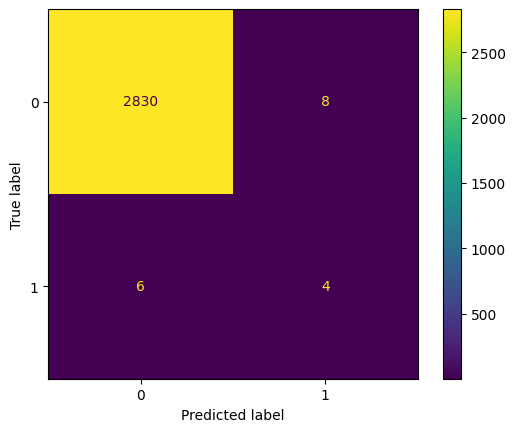

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

knn_metrics = confusion_matrix(knn_y_test, y_pred)

plt.figure(figsize=(20, 10))
ConfusionMatrixDisplay(confusion_matrix=knn_metrics).plot();
plt.show()

### <font color='red'>Random Forest</font>

In [64]:
# check the preprocess data we completed in KNN model. 
dft_model=X_final
dft_x = dft_model.drop(['HasCLABSI_numeric_0.0', 'HasCLABSI_numeric_1.0','HasCLABSI_numeric'], axis=1)
dft_y = df['HasCLABSI_numeric']


In [65]:
dft_X_train, dft_X_test, dft_y_train, dft_y_test = train_test_split(dft_x, dft_y, test_size=0.2,
                                                                    shuffle=True, random_state=random_state)

In [66]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
rf_X_resampled, rf_y_resampled = smote.fit_resample(dft_X_train, dft_y_train)


In [93]:
from sklearn.ensemble import RandomForestClassifier
# we will use 8 decision tree
dft_process = RandomForestClassifier(n_estimators=8, random_state=75,bootstrap=True)



In [68]:
#Train the Random Forest Model on the training date 
dft_process.fit(rf_X_resampled, rf_y_resampled)

RandomForestClassifier(n_estimators=8, random_state=75)

In [69]:
# Conducting Cross-validation.

score_xval_dft = cross_val_score(dft_process, X=rf_X_resampled, y=rf_y_resampled, cv=10, scoring='accuracy')
score_xval_dft.mean()

0.9987223116395472

In [70]:
#Apply the model on test set

dft_pred = dft_process.predict(dft_X_test)

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

dft_accuracy = accuracy_score(dft_y_test, dft_pred)
dft_precision = precision_score(dft_y_test, dft_pred)
dft_recall = recall_score(dft_y_test, dft_pred)

print("Accuracy:", dft_accuracy)
print("Precision:", dft_precision)
print("Recall:", dft_recall)

Accuracy: 0.995435393258427
Precision: 0.4
Recall: 0.36363636363636365


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint



# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),          # Randomized range for the number of trees
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),      # Randomized range for min_samples_split
    'min_samples_leaf': randint(1, 5),        # Randomized range for min_samples_leaf
    'max_features': ['sqrt', 'log2', None]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dft_process,
    param_distributions=param_dist,
    scoring='accuracy',   # Evaluation metric
    n_iter=50,            # Number of parameter settings sampled
    cv=5,                 # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1             # Use all processors
)

# Fit RandomizedSearchCV on the training data
random_search.fit(rf_X_resampled, rf_y_resampled)

# Display the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy Score:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\madhu\miniconda3\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None]     # Number of features to consider when looking for the best split
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=dft_process,
    param_grid=param_grid,
    scoring='accuracy',   # You can use other metrics such as 'roc_auc', 'f1', etc.
    cv=5,                 # 5-fold cross-validation
    verbose=2,
    n_jobs=-1             # Use all processors for parallel processing
)

# Fit GridSearchCV on the training data
grid_search.fit(rf_X_resampled, rf_y_resampled)

# Display the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Accuracy Score: 0.9989424886379646


In [95]:
# Best Random Forest model from GridSearchCV or RandomizedSearchCV
best_rf_model = grid_search.best_estimator_  # Or random_search.best_estimator_

# Fit on the training data
best_rf_model.fit(rf_X_resampled, rf_y_resampled)

# Predict on the test data
rf_y_pred = best_rf_model.predict(dft_X_test)

# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(dft_y_test, rf_y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2837
         1.0       0.44      0.36      0.40        11

    accuracy                           1.00      2848
   macro avg       0.72      0.68      0.70      2848
weighted avg       1.00      1.00      1.00      2848



In [72]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Random state
np.random.seed(3)
random_state = 10

# Train-test split
MLP_train, MLP_test = train_test_split(X_final,
                                      test_size=0.3, shuffle=True, random_state=random_state)

# Separate features (X) and target (y) for train and test sets
y_tr_ohe = MLP_train[['HasCLABSI_numeric_0.0', 'HasCLABSI_numeric_1.0']]
X_tr = MLP_train.drop(columns=['HasCLABSI_numeric_0.0', 'HasCLABSI_numeric_1.0', 'HasCLABSI_numeric'])

y_ts_ohe = MLP_test[['HasCLABSI_numeric_0.0', 'HasCLABSI_numeric_1.0']]
X_ts = MLP_test.drop(columns=['HasCLABSI_numeric_0.0', 'HasCLABSI_numeric_1.0', 'HasCLABSI_numeric'])

# Convert one-hot encoded targets to single-column labels
y_tr_single = y_tr_ohe.idxmax(axis=1).apply(lambda x: int(float(x.split('_')[-1])))  # Extract and convert
y_ts_single = y_ts_ohe.idxmax(axis=1).apply(lambda x: int(float(x.split('_')[-1])))


# SMOTE Resampling
smote = SMOTE(random_state=random_state)
MLP_X_train_resampled, MLP_y_train_resampled = smote.fit_resample(X_tr, y_tr_single)

# Train MLP with resampled data
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), random_state=random_state, max_iter=500)
mlp_model.fit(MLP_X_train_resampled, MLP_y_train_resampled)

# Evaluate the model
print("Test Accuracy:", mlp_model.score(X_ts, y_ts_single))
print(classification_report(y_ts_single, mlp_model.predict(X_ts)))



Test Accuracy: 0.991571060641536
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4255
           1       0.22      0.50      0.31        16

    accuracy                           0.99      4271
   macro avg       0.61      0.75      0.65      4271
weighted avg       1.00      0.99      0.99      4271

